<a href="https://colab.research.google.com/github/probml/probml-notebooks/blob/main/notebooks/GAN_loss_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualise the difference in gradients induced between the original GAN loss and the non-saturating loss

Author: Mihaela Rosca 

In both cases the discriminator is trained using a cross entropy loss:
$$ \max_{\phi} E_{p^*(x)} \log D_{\phi}(x) + E_{p(z)} \log (1 - D_{\phi}{G_{\theta}(z)))} $$

In the case of the zero sum loss the generator is trained using the objective:
$$ \min_{\theta} E_{p(z)} \log (1 - D_{\phi}(G_{\theta}(z))) $$

In the case of a non saturating loss, the generator is trained using the objective:
$$ \min_{\theta} E_{p(z)} - \log (D_{\phi}(G_{\theta}(z))) $$


We want to see how the gradients of these generator losses behave with respect
to the $D_{\phi}(G_{\theta}(z))$. This would tell us something about when the 
generator is learning, as we would like to get a good learning signal when the generator is doing badly (the discriminator can tell the generated data is fake, i.e. $D_{\phi}(G_{\theta}(z))$ is small). Below we see that for the non-saturating loss, we obtain this behaviour, while for the zero sum (or saturating loss), the generator gets a lot less information on how to change when it is not performing well. 




In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


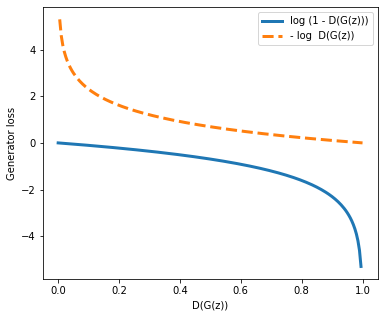

In [ ]:
d_g_x = np.linspace(0.0, 1.0, 200)
loss1 = np.log(1 - d_g_x)
grad1 = 1 / (1 - d_g_x)


loss2 = -np.log(d_g_x)
grad2 = -1 / d_g_x

plt.figure(figsize=(6, 5))
plt.plot(d_g_x, loss1, label="log (1 - D(G(z)))", lw=3)
plt.plot(d_g_x, loss2, label="- log  D(G(z))", lw=3, ls="--")
plt.xlabel("D(G(z))")
plt.ylabel("Generator loss")
plt.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


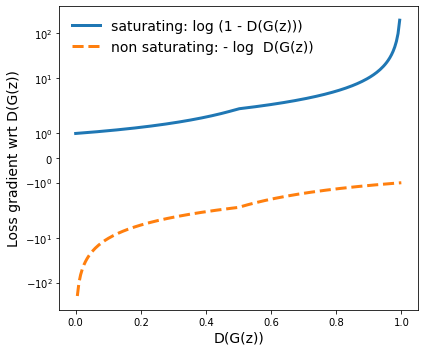

In [ ]:
d_g_x = np.linspace(0.0, 1.0, 200)
loss1 = np.log(1 - d_g_x)
grad1 = 1 / (1 - d_g_x)


loss2 = -np.log(d_g_x)
grad2 = -1 / d_g_x


plt.figure(figsize=(6, 5))
plt.plot(d_g_x, grad1, label="saturating: log (1 - D(G(z))) ", lw=3)
plt.plot(d_g_x, grad2, label="non saturating: - log  D(G(z))", lw=3, ls="--")
plt.xlabel("D(G(z))", fontsize=14)
plt.ylabel("Loss gradient wrt D(G(z))", fontsize=14)
plt.yscale("symlog")
plt.tight_layout()
plt.legend(fontsize=14, framealpha=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


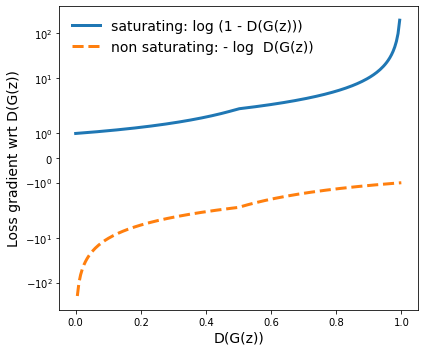

In [ ]:
d_g_x = np.linspace(0.0, 1.0, 200)
loss1 = np.log(1 - d_g_x)
grad1 = 1 / (1 - d_g_x)


loss2 = -np.log(d_g_x)
grad2 = -1 / d_g_x


plt.figure(figsize=(6, 5))
plt.plot(d_g_x, grad1, label="saturating: log (1 - D(G(z)))", lw=3)
plt.plot(d_g_x, grad2, label="non saturating: - log  D(G(z))", lw=3, ls="--")
plt.xlabel("D(G(z))", fontsize=14)
plt.ylabel("Loss gradient wrt D(G(z))", fontsize=14)
plt.yscale("symlog")
plt.tight_layout()
plt.legend(fontsize=14, framealpha=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0.98, 'Loss and gradients for generator loss log (1 - D(G(z)))')

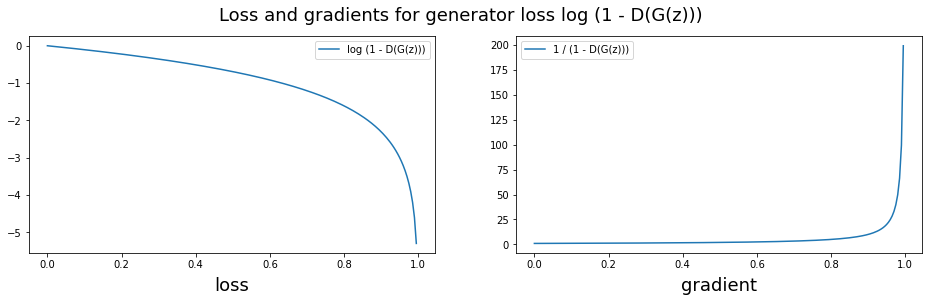

In [ ]:
d_g_x = np.linspace(0.0, 1.0, 200)
loss = np.log(1 - d_g_x)
grad = 1 / (1 - d_g_x)

figsize = (16, 4)
fig, axs = plt.subplots(1, 2, figsize=figsize)


# First plot the loss, and then the derivative.
axs[0].plot(d_g_x, loss, label="log (1 - D(G(z)))")
axs[0].set_title("loss", fontsize=18, y=-0.2)
axs[0].legend()

axs[1].plot(d_g_x, grad, label="1 / (1 - D(G(z)))")
axs[1].set_title("gradient", fontsize=18, y=-0.2)
axs[1].legend()

plt.suptitle("Loss and gradients for generator loss log (1 - D(G(z)))", fontsize=18)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


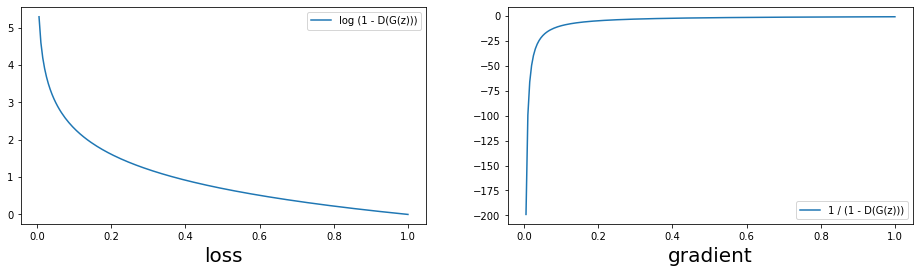

In [ ]:
d_g_x = np.linspace(0.0, 1.0, 200)
loss = -np.log(d_g_x)
grad = -1 / d_g_x

figsize = (16, 4)
fig, axs = plt.subplots(1, 2, figsize=figsize)


# First plot the loss, and then the derivative.
axs[0].plot(d_g_x, loss, label="log (1 - D(G(z)))")
axs[0].set_title("loss", fontsize=20, y=-0.2)
axs[0].legend()
axs[1].plot(d_g_x, grad, label="1 / (1 - D(G(z)))")
axs[1].set_title("gradient", fontsize=20, y=-0.2)
axs[1].legend()